In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from scipy.io import loadmat

In [2]:
mat = loadmat('nirbeer.mat')

In [3]:
type(mat)

dict

In [4]:
mat.keys()

dict_keys(['xaxis', 'Xcal', '__header__', 'ytest', 'Xtest', '__version__', '__globals__', 'ycal'])

In [5]:
Xcal = mat['Xcal']
Xtest = mat['Xtest']
features = mat['xaxis']
ycal = mat['ycal']
ytest = mat['ytest']

In [6]:
series = []
for i in range(Xcal.shape[1]):
    series.append(pd.Series(Xcal[:, i]))
len(series)

926

In [7]:
data = pd.DataFrame()

In [8]:
for i in range(features.shape[1]):
    data[features[0, i]] = series[i]

In [9]:
data.head()

,400,402,404,406,408,410,412,414,416,418,...,2232,2234,2236,2238,2240,2242,2244,2246,2248,2250
0,0.809228,0.839166,0.857076,0.874258,0.884267,0.898585,0.904815,0.905194,0.903488,0.902187,...,3.679895,3.654557,3.653983,3.714209,3.669642,3.625521,3.647152,3.573585,3.623088,3.679775
1,0.804006,0.826189,0.847709,0.865769,0.877828,0.888752,0.893231,0.894017,0.893292,0.891371,...,3.632740,3.738945,3.601677,3.592955,3.606268,3.657218,3.632019,3.660901,3.635919,3.671539
2,0.739626,0.762493,0.775604,0.782518,0.788167,0.795419,0.795223,0.793878,0.790986,0.785020,...,3.563812,3.622122,3.617598,3.652315,3.590150,3.710362,3.630672,3.653063,3.566837,3.704355
3,0.699460,0.713531,0.724313,0.731107,0.736592,0.735468,0.734549,0.731744,0.726163,0.718673,...,3.583575,3.620621,3.682378,3.681044,3.650404,3.645983,3.633222,3.668727,3.650432,3.687260
4,0.702702,0.716579,0.729258,0.736214,0.741270,0.742020,0.740587,0.737819,0.732221,0.723229,...,3.650906,3.728940,3.614735,3.618842,3.656746,3.622961,3.560679,3.710902,3.653769,3.663029


## Plotting the data

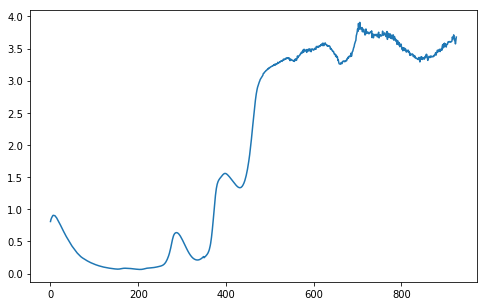

In [10]:
# Plotting  the first data
%matplotlib inline
plt.figure(figsize=(8, 5))
plt.plot(Xcal[0])

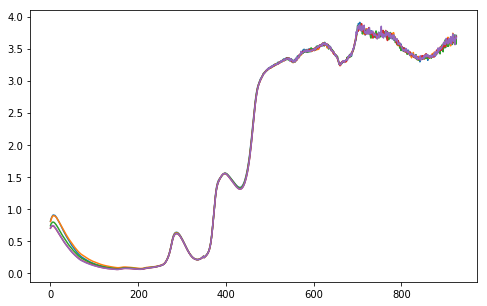

In [11]:
#Plotting the first 5 data points
plt.figure(figsize=(8, 5))
for i in range(5):
    plt.plot(Xcal[i])

### Plotting all data points together

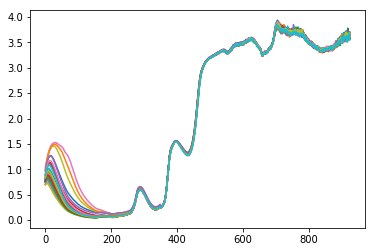

In [12]:
for i in range(Xcal.shape[0]):
    plt.plot(Xcal[i])

### We see that all the 40 beer samples have similar data points at different wavelengths. So we are of the opinion that Linear SVM Regression should be applied with large overfitting.

** Making y_train_true for data. Also building test_data and y_test_true for testing. **

In [13]:
ycal = ycal.ravel()
y_train_true = pd.Series(ycal)

In [14]:
y_train_true.head()

0    4.230000
1    6.020000
2    6.490000
3    8.920000
4    8.979999
dtype: float64

In [15]:
series = []
for i in range(Xtest.shape[1]):
    series.append(pd.Series(Xtest[:, i]))
len(series)

926

In [16]:
test_data = pd.DataFrame()
for i in range(features.shape[1]):
    test_data[features[0, i]] = series[i]

In [17]:
test_data.head()

,400,402,404,406,408,410,412,414,416,418,...,2232,2234,2236,2238,2240,2242,2244,2246,2248,2250
0,0.819094,0.846816,0.864817,0.886129,0.899723,0.910357,0.920238,0.924587,0.924169,0.921422,...,3.629609,3.628768,3.581720,3.651114,3.602773,3.648682,3.613181,3.657350,3.655286,3.597800
1,0.913874,0.955075,0.988696,1.020162,1.044872,1.067709,1.092983,1.107291,1.122817,1.135013,...,3.624469,3.693003,3.671937,3.585491,3.585035,3.656710,3.712139,3.611069,3.602075,3.578345
2,1.005503,1.045450,1.085811,1.127846,1.157784,1.188067,1.219071,1.249703,1.270131,1.296783,...,3.612584,3.712756,3.670530,3.594609,3.566424,3.602968,3.612973,3.664729,3.634739,3.611298
3,0.845709,0.872790,0.901841,0.925214,0.946609,0.956449,0.971971,0.981736,0.986136,0.991593,...,3.628277,3.614616,3.592516,3.597444,3.656557,3.670788,3.644199,3.628403,3.614521,3.553668
4,0.733568,0.755497,0.767425,0.779585,0.785675,0.787037,0.787917,0.785697,0.780111,0.774473,...,3.560951,3.655813,3.581869,3.722736,3.618501,3.641515,3.644560,3.690709,3.638474,3.687253


In [18]:
y_test_true = pd.Series(ytest.ravel())

In [19]:
y_test_true.head()

0     4.24
1     7.14
2    10.07
3    10.39
4    10.51
dtype: float64

## Applying the model

In [20]:
# Parameters tuned for overfitting

In [21]:
clf = svm.SVR(C=1000, kernel='linear', gamma=0.1)

In [22]:
clf.fit(data, y_train_true)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [23]:
y_predicted = clf.predict(test_data)

### Finding RMS error

In [24]:
error = (np.sum((y_predicted - y_test_true)**2)/20)**(1/2)

In [25]:
print('error: ', error)

error:  0.752967973101


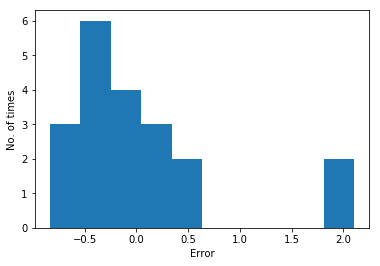

In [26]:
plot_error = y_predicted - y_test_true
plt.xlabel('Error')
plt.ylabel('No. of times')
plt.hist(plot_error)
plt.show()

## Applying other SVR models

** Basic SVR **

error:  2.45304958961


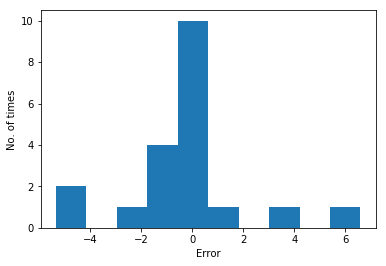

In [27]:
clf = svm.SVR(C=1, kernel='rbf', gamma='auto')
clf.fit(data, y_train_true)
y_predicted = clf.predict(test_data)
error = (np.sum((y_predicted - y_test_true)**2)/20)**(1/2)
print('error: ', error)
plot_error = y_predicted - y_test_true
plt.xlabel('Error')
plt.ylabel('No. of times')
plt.hist(plot_error)
plt.show()

** RBF with overfitting **

error:  0.937845865556


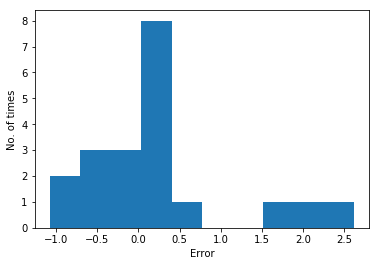

In [28]:
clf = svm.SVR(C=1000, kernel='rbf', gamma=0.1)
clf.fit(data, y_train_true)
y_predicted = clf.predict(test_data)
error = (np.sum((y_predicted - y_test_true)**2)/20)**(1/2)
print('error: ', error)
plot_error = y_predicted - y_test_true
plt.xlabel('Error')
plt.ylabel('No. of times')
plt.hist(plot_error)
plt.show()

** Polynomial with overfitting **

error:  0.732990069301


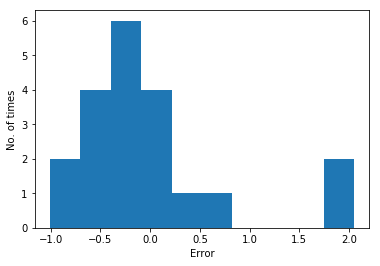

In [29]:
clf = svm.SVR(C=1000, kernel='poly', gamma=0.1)
clf.fit(data, y_train_true)
y_predicted = clf.predict(test_data)
error = (np.sum((y_predicted - y_test_true)**2)/20)**(1/2)
print('error: ', error)
plot_error = y_predicted - y_test_true
plt.xlabel('Error')
plt.ylabel('No. of times')
plt.hist(plot_error)
plt.show()